In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
from keras.layers.core import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [2]:
#Digit MNIST dataset
(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()

(X_train_digit, y_train_digit), (X_test_digit, y_test_digit) = mnist.load_data()
    It loads the MNIST dataset (handwritten digit images) into four variables:
    
        X_train_digit — training images
        
        y_train_digit — training labels (which digit each image is)
        
        X_test_digit — test images
        
        y_test_digit — test labels
    
    MNIST is a classic dataset of 28×28 grayscale images of digits 0–9 used to learn image classification.

X_train_digit and X_test_digit contents

    They are NumPy arrays of images.
    
    Typical shape: (60000, 28, 28) for training and (10000, 28, 28) for testing:
    
    60000 images in training, 10000 in test.
    
    Each image is 28 pixels tall × 28 pixels wide.
    
    Pixel values are usually integers 0–255 (dtype uint8). 0 = black, 255 = white.
    
y_train_digit and y_test_digit contents
    
    1D NumPy arrays of integer labels, shape (60000,) and (10000,).
    
    Each label is an integer 0–9 telling which digit the corresponding image shows.    
    

In [3]:
 y_test_digit[3]

0

In [4]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

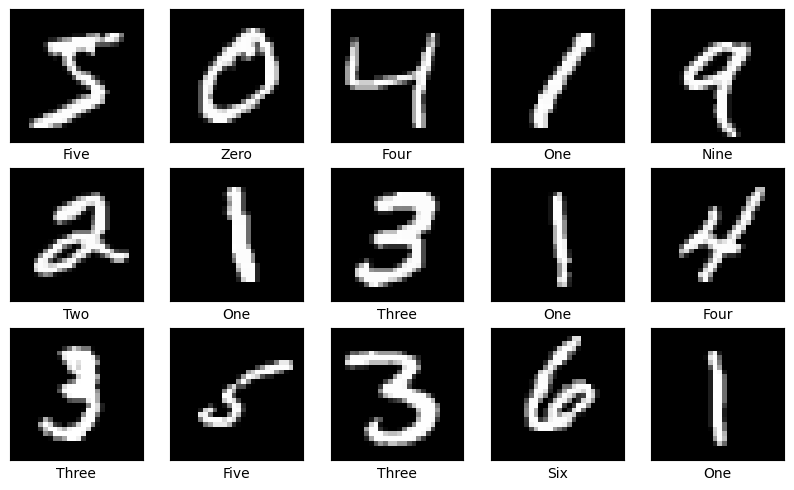

In [5]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

1. Naming the digits
    col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
    You are making a Python list of strings.
    The index 0 corresponds to "Zero", index 1 to "One", … up to 9.
    This way, instead of showing just the number 5, you can display "Five" as a label under each image.

2. Setting up the figure
    plt.figure(figsize=(10,10))
    This creates a blank “canvas” for plotting.
    figsize=(10,10) means the figure is 10 inches wide × 10 inches tall.
    Larger figure → more space for subplots.

3. Looping through images
    for i in range(15):
    This loops from i = 0 up to 14 (so, 15 images total).
    You’ll plot the first 15 images from the training set.

4. Creating subplots
    plt.subplot(5,5,i+1)
    You’re dividing the big figure into a grid of 5 rows × 5 columns.
    That gives you 25 possible “slots.”
    i+1 chooses which slot to put the current image into. (Subplots are numbered starting at 1, not 0.)
    So image 0 goes to position 1, image 1 goes to position 2, etc.

5. Removing axis ticks
    plt.xticks([])
    plt.yticks([])
    This hides the numbers on the X and Y axes (since we don’t care about pixel coordinates, we just want a clean image).

6. Showing the digit image
    plt.imshow(X_train_digit[i], cmap='gray')
    X_train_digit[i] selects the i-th training image (shape 28×28).
    imshow plots it as an image.
    cmap='gray' forces it to display in grayscale (instead of using random colors).

7. Adding a label under the image
    plt.xlabel(col_names[y_train_digit[i]])
    y_train_digit[i] gives the label number (e.g., 3).
    col_names[3] looks that up in your list → "Three".
    That string is shown below the image as the X-axis label.

8. Displaying all at once
    plt.show()
    After the loop finishes, plt.show() displays the figure with all 15 images arranged in the 5×5 grid.

✅ End result:
You get a 5×5 grid of images (though only 15 are filled), each showing a handwritten digit, with a word label like “Zero”, “One”, etc.

In [6]:
X_train_digit.shape

(60000, 28, 28)

In [7]:
X_test_digit.shape

(10000, 28, 28)

<h1>Preprocessing the input-Converting 3D to 2D</h1>

In [8]:
X_train_digit = X_train_digit.reshape(60000, 784)
X_test_digit = X_test_digit.reshape(10000, 784)

1. What we have before reshaping
    X_train_digit shape is (60000, 28, 28)
    60,000 images
    each image is 28 × 28 pixels
    X_test_digit shape is (10000, 28, 28)
    10,000 test images
    So right now, each image is stored as a 2D grid (like a tiny 28×28 black-and-white photo).

2. What .reshape(60000, 784) does
    X_train_digit = X_train_digit.reshape(60000, 784)
    28 × 28 = 784 → you’re flattening each 2D image into a 1D vector of 784 numbers.
    Shape becomes (60000, 784):
    60,000 images
    each one is now just a row of 784 pixel values
    Similarly for the test set:
    X_test_digit = X_test_digit.reshape(10000, 784)
    Shape: (10000, 784).

3. Why do this?

    Some models (like logistic regression, SVM, simple fully-connected neural nets) expect each input to be a flat vector rather than a 2D image.
    So:
    Before: 28 × 28 grid
    After: [784 numbers]
    Example (a 3×3 image, just to simplify):
    Before (3x3 image):
    [ [1, 2, 3],
      [4, 5, 6],
      [7, 8, 9] ]
    After flatten (length 9 vector):
    [1, 2, 3, 4, 5, 6, 7, 8, 9]
    That’s exactly what .reshape(..., 784) is doing — flattening each image.

4. When NOT to reshape
    If you plan to use a Convolutional Neural Network (CNN), you should not flatten.
    CNNs need the original 2D structure (28, 28, 1) to recognize shapes and patterns in the image.

✅ Summary:

    Original: (60000, 28, 28) → images as grids
    Reshaped: (60000, 784) → images as flat rows
    Reason: Many ML models work with vectors, not grids.
    
    We convert from 3D (60000, 28, 28) → 2D (60000, 784) in ANN because:
    ANN requires a flat vector of features for each sample.
    Flattening turns each 28×28 image into a single vector of 784 pixel values.
    Without this, a dense layer wouldn’t know how to connect weights to the input.

In [9]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [10]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)

y_test_digit = to_categorical(y_test_digit, num_classes=10)

1. What the labels look like before encoding

    y_train_digit originally is a 1D array of integers.
    Example:
    y_train_digit[:5] → [5, 0, 4, 1, 9]
    Each number is the class label (the digit in the image).

   Shape before encoding:
        y_train_digit.shape → (60000,)
        y_test_digit.shape → (10000,)

3. What to_categorical does
    from tensorflow.keras.utils import to_categorical
    y_train_digit = to_categorical(y_train_digit, num_classes=10)
    
    to_categorical converts integer labels into one-hot encoded vectors.
    num_classes=10 because we have digits 0–9 (10 classes).
    
    Example:
    Digit 5 → [0,0,0,0,0,1,0,0,0,0]
    Digit 0 → [1,0,0,0,0,0,0,0,0,0]
    Digit 9 → [0,0,0,0,0,0,0,0,0,1]

3. Why do we need this?

    Neural networks for multi-class classification usually expect the labels in one-hot encoded form.
    The output layer of your ANN will have 10 neurons (one for each digit).
    The network predicts probabilities, e.g.:
    [0.01, 0.02, 0.05, 0.80, 0.01, 0.03, 0.02, 0.02, 0.02, 0.02]
    → "most likely class = 3" (since 0.80 is highest).
    To train the network, you compare this probability vector with the true one-hot vector (e.g., [0,0,0,1,0,0,0,0,0,0] for digit 3).
    This comparison is done using categorical crossentropy loss.

4. Shape after encoding

    y_train_digit.shape → (60000, 10)
    y_test_digit.shape → (10000, 10)
    So now:
    Each row = one image’s label
    Each row has 10 entries (0s and one 1)

✅ Summary:

    Before: labels were numbers (0–9).
    After: labels are one-hot encoded vectors of length 10.
    Reason: ANN needs this format for multi-class classification.

In [11]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

<h1> Model Creation</h1>

In [12]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(10,activation='sigmoid'),
])

1. Sequential model
    model = keras.Sequential([
                            ...
                           ])
    
    Sequential means your model is built as a stack of layers, one after another.
    Data flows from the first layer → middle layers → final layer.
    Think of it like a pipeline: input → hidden layers → output.

3. First layer: Dense(256, …)
    layers.Dense(256, activation='relu', input_shape=(784,))
    Dense layer = fully connected layer (every input neuron connects to every output neuron).
    256 → number of neurons in this layer.
    activation='relu' → applies ReLU (Rectified Linear Unit) activation function:
        f(x)=max(0,x)
    This helps the network learn non-linear patterns.

    input_shape=(784,) → each input image has 784 features (flattened 28×28).
    So this tells the network: “Expect vectors of length 784 as input.”

3. Hidden layers
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    These are hidden layers with 64 neurons each.

    Again, using ReLU activation.
    Their job is to learn progressively more abstract patterns from the data.

4. Output layer
    layers.Dense(10, activation='sigmoid'),
    Dense(10) → 10 output neurons, one for each digit class (0–9).
    Activation = 'sigmoid' → gives an output between 0 and 1 for each neuron.

⚠️ Note:
    For multi-class classification like MNIST, the usual choice is softmax, not sigmoid.
    softmax ensures that all 10 outputs add up to 1 (a proper probability distribution).
    sigmoid treats each class independently (better for multi-label problems, not single-label classification).

    👉 So, this line should usually be:

    layers.Dense(10, activation='softmax')

5. The commented-out layers
    # layers.Dropout(0.3),
    # layers.BatchNormalization(),
    
    
    These are useful “add-ons” to improve training:
    
    Dropout(0.3) → randomly turns off 30% of neurons during training.
    Prevents overfitting (model memorizing instead of generalizing).
    
    BatchNormalization() → normalizes layer outputs for more stable and faster training.
    
    They’re commented out now (#), but you can enable them later if your model overfits.

✅ Summary of your ANN architecture

    Input: 784 features (flattened pixels).
    Hidden layers:
        Dense(256, ReLU)
        Dense(64, ReLU)
        Dense(64, ReLU)
        Output: Dense(10, Softmax) → probability for each digit.

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [14]:
# For Reference
# https://keras.io/api/losses/probabilistic_losses/#sparsecategoricalcrossentropy-class 

In [15]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics = ['accuracy'])

1. model.compile(...)

    compile = configure the learning process.
    You’re defining:
    loss function → how errors are measured
    optimizer → how the model updates weights
    metrics → what performance measure to report
    Think of it like:
    "I’ve built the engine (model), now I decide what kind of fuel (optimizer), speedometer (metrics), and goal (loss function) I want."

2. Loss function
    loss="categorical_crossentropy"
    Loss = a formula that measures how far predictions are from the true labels.
    Categorical Crossentropy is the standard choice for multi-class classification with one-hot encoded labels.
    Example:
    True label (digit 3) = [0,0,0,1,0,0,0,0,0,0]
    Predicted probs = [0.01,0.05,0.1,0.7,0.02,0.03,0.01,0.03,0.04,0.01]
    Crossentropy measures how close these two distributions are.
    Smaller loss → better predictions.
    ⚠️ If you had labels as integers (not one-hot), you’d use sparse_categorical_crossentropy instead.

3. Optimizer
    optimizer="adam"
    Optimizer = algorithm that adjusts the weights to reduce loss.
    Adam (Adaptive Moment Estimation) is a very popular choice:
    Combines the good parts of Momentum and RMSprop optimizers.
    Learns efficiently with default settings, so it’s beginner-friendly.
    It decides “how big each step should be” when updating weights.

4. Metrics
    metrics=['accuracy']
    Metrics = what performance numbers you want to monitor.
    accuracy = percentage of correct predictions.
    During training, Keras will show you:
    Training accuracy
    Validation accuracy (if you give validation data)
    So you can see if your model is learning well.

✅ Summary:
    Loss: Categorical Crossentropy → compare predicted probabilities vs true one-hot labels.
    Optimizer: Adam → efficient weight update method.
    Metrics: Accuracy → human-readable performance measure.

In [16]:
history=model.fit(X_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(X_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 1.4623 - accuracy: 0.8405 - val_loss: 0.3587 - val_accuracy: 0.9103
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.2796 - accuracy: 0.9241 - val_loss: 0.2552 - val_accuracy: 0.9323
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1937 - accuracy: 0.9460 - val_loss: 0.2243 - val_accuracy: 0.9452
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1670 - accuracy: 0.9538 - val_loss: 0.1933 - val_accuracy: 0.9532
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1385 - accuracy: 0.9608 - val_loss: 0.2296 - val_accuracy: 0.9416
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1288 - accuracy: 0.9643 - val_loss: 0.1654 - val_accuracy: 0.9581
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1113 - accuracy: 0.9681 - val_loss: 0.1803 - val_accuracy: 0.9564
Epoch 

1. history = model.fit(...)

    fit = “fit the model to the data,” i.e., train it.
    Keras trains the model using the training data and tracks progress.
    The result (history) is an object that stores the loss & accuracy over epochs.

2. Training data
    X_train_digit, y_train_digit
    Input data: X_train_digit (60000 × 784 flattened images).
    Labels: y_train_digit (60000 × 10 one-hot encoded labels).

3. batch_size=100

    Neural networks don’t process all 60,000 images at once (too big for memory).
    Instead, they split the dataset into mini-batches.
    Here: each batch = 100 samples.
    So 60,000 / 100 = 600 batches per epoch.

    📌 Process:
    Take 100 images → forward pass → calculate loss → backward pass → update weights.
    Repeat until all 60,000 images are used once.
    That’s one epoch.

4. epochs=10

    An epoch = one full pass through the training set (all 60,000 images).
    You’re training for 10 epochs → the model will see the entire dataset 10 times.
    More epochs → better learning, but too many can cause overfitting.

5. validation_data=(X_test_digit, y_test_digit)

    After each epoch, the model also evaluates on test data (10,000 images).
    This gives you validation loss & accuracy.
    It helps check if the model is generalizing or just memorizing training data.

6. What happens during training

    For each epoch:
    
        Split training data into batches of 100.
    
    For each batch:
    
        Forward pass: predict outputs.
        Compute loss (categorical crossentropy).
        Backward pass: update weights using Adam optimizer.
    
    At the end of the epoch:
    
        Compute average training loss & accuracy.
        Evaluate on validation data → validation loss & accuracy.

7. What history contains

    history is a Python object with logs. Example:
    history.history
    might look like:
    
    {
     'loss': [0.45, 0.30, 0.25, ...],
     'accuracy': [0.87, 0.92, 0.94, ...],
     'val_loss': [0.40, 0.28, 0.23, ...],
     'val_accuracy': [0.89, 0.93, 0.95, ...]
    }
    
    loss → training loss per epoch
    accuracy → training accuracy per epoch
    val_loss → validation loss per epoch
    val_accuracy → validation accuracy per epoch
    You can use this to plot learning curves.

✅ Summary:

    fit trains the model with training data, in mini-batches, over multiple epochs.
    Validation data checks generalization.
    The history object stores training progress for analysis.

In [17]:
test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)

313/313 [==============================] - 1s 2ms/step - loss: 0.1600 - accuracy: 0.9608


1. model.evaluate(...)
    test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)
    evaluate runs the model on the test set.
    It computes the same metrics you specified in model.compile:
    The loss (categorical crossentropy here).
    The accuracy (since you added metrics=['accuracy']).

2. Input parameters

    X_test_digit → test images (10,000 × 784 after reshaping).
    y_test_digit → test labels (10,000 × 10, one-hot encoded).
    These were kept aside during training so you can check generalization.

3. Returned values

    test_loss_digit → a single number = how well (or badly) the model fits the test data. Lower = better.
    test_acc_digit → accuracy on test data (percentage of correct predictions). Higher = better.
    Example:
    test_loss_digit, test_acc_digit = model.evaluate(X_test_digit, y_test_digit)
    print("Test Loss:", test_loss_digit)
    print("Test Accuracy:", test_acc_digit)
    Might print:
    Test Loss: 0.08
    Test Accuracy: 0.978
    👉 That means the model got 97.8% of test digits correct 🎯

4. Why evaluate?
    
    During training, you saw validation accuracy after each epoch.
    But the final test accuracy is the true measure of how good your model is.
    This prevents overfitting (memorizing training data only).
    ✅ Summary:
    evaluate = runs the trained model on new data and reports loss + metrics.
    You saved the results into test_loss_digit and test_acc_digit.
    This tells you how good your model is at recognizing digits it has never seen before.

In [18]:
print('Digit MNIST Test accuracy:', round(test_acc_digit,4))

Digit MNIST Test accuracy: 0.9608


In [19]:
#Predicting the labels-DIGIT
y_predict = model.predict(X_test_digit)

313/313 [==============================] - 1s 2ms/step


1. What this line does
    y_predict = model.predict(X_test_digit)
    model.predict(...) runs the model forward on the input data.
    Input: X_test_digit (10,000 test images).
    Output: y_predict → predicted probabilities for each class (digit 0–9).

2. Shape of predictions

    Since you have 10,000 test images and 10 output classes:
    y_predict.shape = (10000, 10)
    Each row = predictions for one image.
    Each column = probability of the image being a particular digit.
    Example:
    y_predict[0]
    might give:
    [1.2e-05, 0.003, 0.001, 0.97, 0.0002, 0.015, 0.002, 0.004, 0.001, 0.002]
    👉 Means:
    Model thinks it’s 97% chance the digit is 3.
    Small probabilities for other digits.

3. Converting probabilities to actual digit labels

    Right now, y_predict contains probability vectors. To get the predicted digit, use argmax:
    import numpy as np
    y_pred_labels = np.argmax(y_predict, axis=1)
    argmax finds the index of the maximum probability.
    
    Example:
    [0.01, 0.05, 0.02, 0.90, 0.01, ...] → 3
    [0.80, 0.05, 0.05, 0.02, 0.08, ...] → 0
    So:
    y_pred_labels.shape = (10000,)
    Each entry is an integer 0–9.

4. Comparing predictions with true labels
    y_true_labels = np.argmax(y_test_digit, axis=1)   # convert one-hot back to integers
    print("First 10 predictions:", y_pred_labels[:10])
    print("First 10 true labels:", y_true_labels[:10])
    This shows how well the model matches ground truth.

✅ Summary:

    model.predict → gives probability scores for each class.
    Use argmax → convert probabilities into actual digit predictions.
    Compare with test labels → see accuracy in action.        

In [20]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1. Prediction side
    y_predicts = np.argmax(y_predict, axis=1)
    y_predict shape = (10000, 10) → 10,000 rows (test images), 10 columns (probabilities for digits 0–9).
    Example for one image:
    [0.01, 0.02, 0.05, 0.80, 0.02, 0.05, 0.02, 0.01, 0.01, 0.01]
    np.argmax(..., axis=1) → find the index of the largest probability along each row.
    Here, max is 0.80 at index 3.
    So the predicted class is 3.
    Result:
    y_predicts.shape = (10000,)
    A flat array of predicted labels like:
    [3, 0, 4, 1, 9, ...]

2. True label side
    y_test_digit_eval = np.argmax(y_test_digit, axis=1)
    Recall: y_test_digit is one-hot encoded (shape (10000, 10)).
    Example for digit 3:
    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
    np.argmax(..., axis=1) → gives index of the 1.
    Here, index 3.
    Result:
    y_test_digit_eval.shape = (10000,)
    A flat array of true labels like:
    [5, 0, 4, 1, 9, ...]

3. Why this step is important

    Before: labels were in one-hot encoding (good for training, but not human-readable).
    After: both predicted and true labels are simple integers 0–9.
    This makes it easy to compare, measure accuracy, or build a confusion matrix.

4. Example comparison
    print("Predicted:", y_predicts[:10])
    print("True     :", y_test_digit_eval[:10])
    Might output:
    Predicted: [7 2 1 0 4 1 4 9 5 9]
    True     : [7 2 1 0 4 1 4 9 5 9]
    👉 If they match → model was correct.

✅ Summary:
    
    np.argmax(y_predict, axis=1) → predicted class for each test image.
    np.argmax(y_test_digit, axis=1) → true class for each test image.
    Both are now integer arrays → easy to compare.

In [21]:
y_predicts[0]

7

In [22]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [23]:
y_pre=pd.DataFrame(y_predicts)

In [24]:
y_pre

,0
0,7
1,2
2,1
3,0
4,4
...,...
9995,2
9996,3
9997,4
9998,5


In [25]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

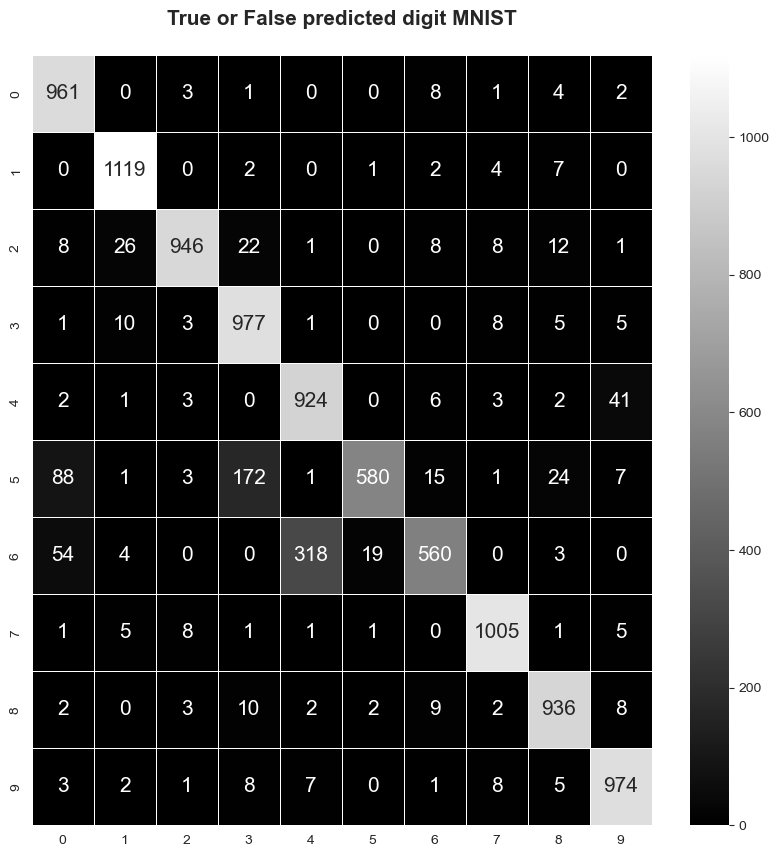

In [27]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
#plt.style.use('seaborn-deep')
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

con_mat = confusion_matrix(y_test_digit_eval, y_predicts)
    y_test_digit_eval → true labels (integers 0–9).
    
    y_predicts → predicted labels (integers 0–9).
    
    confusion_matrix(...) creates a 10×10 matrix.

👉 What it means:

    Rows = actual labels (ground truth).
    
    Columns = predicted labels.
    
    Each cell (i, j) = number of times digit i was predicted as digit j.
    
    Example: if the cell at (4,9) = 15, it means:
    
    The digit 4 was incorrectly predicted as 9 → 15 times.

2. Style setup
    python
    Copy code
    plt.style.use('seaborn-deep')
    Changes matplotlib’s plot style (colors, background, fonts, etc.).
    
    "seaborn-deep" = a clean style inspired by seaborn.

3. Plotting the heatmap
    python
    Copy code
    plt.figure(figsize=(10,10))
    sns.heatmap(con_mat, annot=True, annot_kws={'size': 15}, linewidths=0.5, fmt="d", cmap="gray")
    sns.heatmap(...) → draws a color-coded grid.
    con_mat = confusion matrix data.
    annot=True → writes the numbers inside each cell.
    annot_kws={'size': 15} → annotation font size.
    linewidths=0.5 → thin lines between cells.
    fmt="d" → format as integer (not decimal).
    cmap="gray" → grayscale color scheme.

4. Title
    python
    Copy code
    plt.title('True or False predicted digit MNIST\n', fontweight='bold', fontsize=15)
    Adds a bold, larger title above the heatmap.

5. Show the plot
    python
    Copy code
    plt.show()
    Displays the confusion matrix.

6. How to read the matrix
    The diagonal cells (top-left to bottom-right) = correct predictions.
    Example: cell (3,3) = number of times digit 3 was correctly predicted as 3.
    The off-diagonal cells = mistakes.
    Example: cell (5,8) = number of times digit 5 was predicted as 8.
    ✅ A perfect model would have all numbers only on the diagonal.
    Example (simplified 3×3 case):
    css
    Copy code
             Predicted
             0   1   2
    True 0  [50   2   1]
         1  [ 0  47   3]
         2  [ 0   1  49]
    Digit 0: predicted correctly 50 times, but twice as 1, once as 2.
    Digit 1: predicted correctly 47 times, misclassified 3 times as 2.
    Digit 2: predicted correctly 49 times, once misclassified as 1.

✅ Summary:

    The confusion matrix shows where the model succeeds (diagonal) and where it confuses digits (off-diagonal).
    Heatmap makes this very visual.
    Great tool to diagnose which digits are tricky (e.g., 4 vs 9, 5 vs 6).

In [28]:
from sklearn.metrics import classification_report

print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       980
           1       0.96      0.99      0.97      1135
           2       0.98      0.92      0.95      1032
           3       0.82      0.97      0.89      1010
           4       0.74      0.94      0.83       982
           5       0.96      0.65      0.78       892
           6       0.92      0.58      0.71       958
           7       0.97      0.98      0.97      1028
           8       0.94      0.96      0.95       974
           9       0.93      0.97      0.95      1009

    accuracy                           0.90     10000
   macro avg       0.91      0.89      0.89     10000
weighted avg       0.91      0.90      0.89     10000



In [29]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


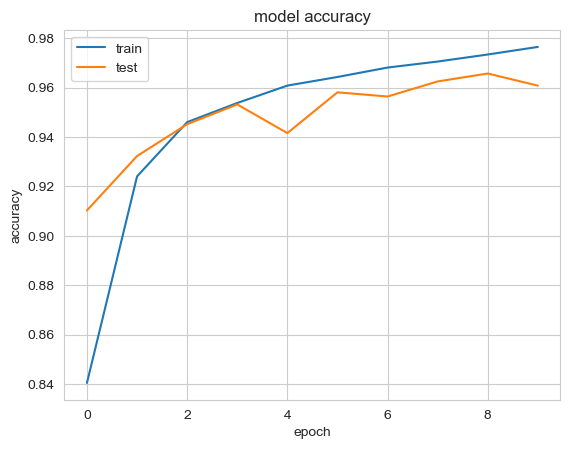

In [30]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

# plot training accuracy
plt.plot(history.history['accuracy'])
    This plots the training accuracy for each epoch (x-axis = epoch number, y-axis = accuracy).
    
    history.history['accuracy'] is a list with one value per epoch.

# plot validation accuracy
plt.plot(history.history['val_accuracy'])
    This plots the validation accuracy (using your test data) for each epoch.

    It helps check if the model is overfitting (when training accuracy goes up, but validation accuracy stops improving or goes down).


plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
    Adds title and axis labels.
    legend(['train','test']) means:
    Blue line (first plot) = training accuracy
    Orange line (second plot) = validation (test) accuracy

plt.show()
    Finally shows the graph.

✅ What you’ll see
    X-axis (epoch): how many times the dataset was passed through the model.
    Y-axis (accuracy): how well the model predicted correctly.
    Two lines:
    Training accuracy (usually rising quickly).
    Validation accuracy (should also rise, but may flatten out earlier).


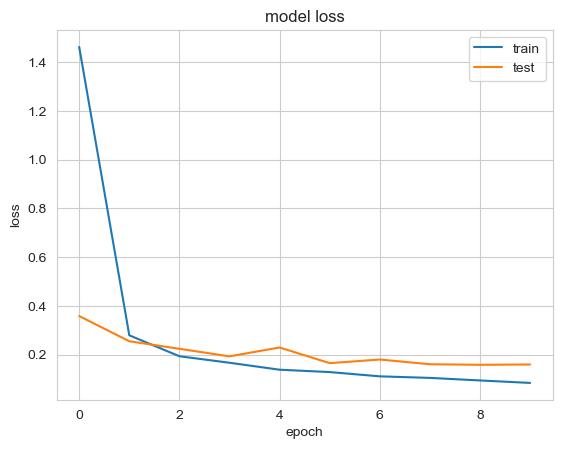

In [31]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

plt.plot(history.history['loss'])
    Plots the training loss (how much error the model makes on the training set) after each epoch.

plt.plot(history.history['val_loss'])
    Plots the validation loss (error on the test/validation set) after each epoch.

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
    Adds labels, legend, and displays the graph.

✅ What the graph tells you
    
    Loss is the opposite of accuracy → lower is better.
    Training loss should go down steadily as the model learns.
    Validation loss should also go down, but:
    If it starts going up while training loss goes down → overfitting (the model is memorizing training data instead of generalizing).
    If both losses stay high → underfitting (the model is too simple or not trained enough).
    If both go down and stabilize close to each other → ✅ good fit.

🔁 Together with accuracy plot

    Accuracy curve shows how well the model predicts correctly.
    Loss curve shows how much error remains.
    Both together help you judge the model’s learning behavior.

In [32]:
#tf.expand_dims(X_test_digit[0])
y_predict_single = model.predict(X_test_digit[[2]])
y_predicts_single=np.argmax(y_predict_single, axis=1) # Here we get the index of maximum value in the encoded vector
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

1/1 [==============================] - 0s 106ms/step


# tf.expand_dims(X_test_digit[0])
    (Commented out) → tf.expand_dims is a way to add an extra dimension so the model sees the input as a batch.
    Neural networks expect 2D input for Dense layers: (batch_size, features).
    A single image has shape (784,), but the model expects (1, 784).

    tf.expand_dims(X_test_digit[0], axis=0) changes shape from (784,) → (1, 784).


y_predict_single = model.predict(X_test_digit[[2]])
    Here, you’re passing one test sample (X_test_digit[[2]]) to the model.
    [[2]] keeps the batch dimension (so shape becomes (1, 784) instead of (784,)).
    The model outputs a probability vector of length 10 (since we have 10 digits: 0–9). Example:
    [[1.2e-04, 3.5e-05, 0.99, 0.0001, 0.00002, ...]]
    → this means the model is ~99% confident the digit is 2.


y_predicts_single = np.argmax(y_predict_single, axis=1)
    np.argmax finds the index of the maximum probability.
    If the output was [0.01, 0.02, 0.95, ...], the max is at index 2.
    So the predicted label = 2.

y_test_digit_eval = np.argmax(y_test_digit, axis=1)
    Your test labels (y_test_digit) were one-hot encoded (e.g., 2 → [0,0,1,0,0,0,0,0,0,0]).

    np.argmax(..., axis=1) converts them back into normal integers ([2] instead of one-hot).

✅ Result
    y_predicts_single → model’s prediction for sample #2.
    y_test_digit_eval[2] → the true label for that same test sample.
    So check:
    print("Predicted:", y_predicts_single[0])
    print("Actual:", y_test_digit_eval[2])

In [33]:
y_predicts_single[0]

1

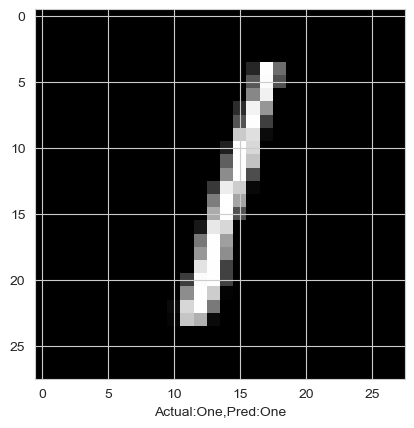

In [34]:
#Names of numbers in the dataset in order
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
plt.xlabel("Actual:{},Pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()

In [ ]:
col_names = ['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
    A list to convert digit numbers (0–9) into human-readable names ("Zero", "One", …).

plt.imshow(X_test_digit[2].reshape(28,28), cmap='gray')
    X_test_digit[2] → the third test image.

    Earlier, we reshaped test data into (10000, 784) (2D).

    Now we reshape back to (28, 28) so imshow can display it as an image.

cmap='gray' → shows the digit in grayscale.

    plt.xlabel("Actual:{},Pred:{}".format(
        col_names[np.argmax(y_test_digit[2])],   # true label
        col_names[y_predicts_single[0]]          # predicted label
    ))
    np.argmax(y_test_digit[2]) → finds the true digit (because labels are one-hot encoded).

    y_predicts_single[0] → model’s predicted digit.

    Both are mapped to words using col_names.

    Example: "Actual: Two, Pred: Two".

plt.show()
    Displays the digit image with the label text under it.

✅ Output
    You’ll see the digit image (for sample index 2).

Below it, the text:
    Actual: Two, Pred: Two

In [35]:
y_test_digit[8]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)